In [1]:
# data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats


import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### EDA Process before Preprocessing

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
# To check the duplicates of the data
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [5]:
df_eda = df
df_eda.drop(columns=['EmployeeCount', 'StandardHours'],axis =1, inplace = True )
#df_eda

In [6]:
# Create a list of categorical variables
# Since the dtype of categorical variable is Object we can compare the values with 'O' 
categorical = [var for var in df_eda.columns if df_eda[var].dtype == 'O']

# Create a list of discrete variables
# we do not want to consider Exited as this is target variable
discrete = [
    var for var in df_eda.columns if df_eda[var].dtype != 'O'
    and len(df_eda[var].unique()) < 20
]

# Create a list of continuous Variables
# We don't wan't to consider CustomerId here
# we do not want to consider Exited as this is target variable
continuous = [
    var for var in df_eda.columns if df_eda[var].dtype != 'O'
    if var not in discrete
]

In [7]:
# check continous Variables
continuous

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

In [8]:
# check categorical variables
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [9]:
# check discrete variables
discrete

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
# Check number of unique values for discrete variables
total_unique_values= df[discrete].nunique()
for key, value in total_unique_values.items():
    if value > 0:
        print(key,":",value)

Education : 5
EnvironmentSatisfaction : 4
JobInvolvement : 4
JobLevel : 5
JobSatisfaction : 4
NumCompaniesWorked : 10
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StockOptionLevel : 4
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [11]:
# check values for discrete variables
for var in discrete:
    print(var, df[var].unique(), '\n')

Education [2 1 4 3 5] 

EnvironmentSatisfaction [2 3 4 1] 

JobInvolvement [3 2 4 1] 

JobLevel [2 1 3 4 5] 

JobSatisfaction [4 2 3 1] 

NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3] 

PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25] 

PerformanceRating [3 4] 

RelationshipSatisfaction [1 4 2 3] 

StockOptionLevel [0 1 3 2] 

TrainingTimesLastYear [0 3 2 5 1 4 6] 

WorkLifeBalance [1 3 2 4] 

YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17] 

YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14] 

YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14] 



In [12]:
# check values for continuous variables
# we will check the first 20 values
for var in continuous:
    print(var, df[var].unique()[0:20], '\n')

Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42] 

DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371] 

DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25] 

EmployeeNumber [ 1  2  4  5  7  8 10 11 12 13 14 15 16 18 19 20 21 22 23 24] 

HourlyRate [94 61 92 56 40 79 81 67 44 84 49 31 93 50 51 80 96 78 45 82] 

MonthlyIncome [ 5993  5130  2090  2909  3468  3068  2670  2693  9526  5237  2426  4193
  2911  2661  2028  9980  3298  2935 15427  3944] 

MonthlyRate [19479 24907  2396 23159 16632 11864  9964 13335  8787 16577 16479 12682
 15170  8758 12947 10195 15053  7324 22021  4306] 

TotalWorkingYears [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14] 

YearsAtCompany [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11] 



In [13]:
for var in categorical:
    print(var, df[var].unique(), '\n')

Attrition ['Yes' 'No'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department ['Sales' 'Research & Development' 'Human Resources'] 

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender ['Female' 'Male'] 

JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus ['Single' 'Married' 'Divorced'] 

Over18 ['Y'] 

OverTime ['Yes' 'No'] 



In [14]:
def diagnostic_plots(df, variable):
    '''
    This function takes a dataframe (df) and
    the variable of interest as arguments.
    And it plots histogram, box-plot and QQ-plot.
    '''

    # define figure size
    plt.figure(figsize=(16, 4))

    '''
    We can use subplot to plot various plots in same plot, so that it can viewed as a single plot.
    Using this function we can create a table of plots.
    '''
    # histogram
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # plt.subplot(num rows, num columns, index)
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')

    plt.show()

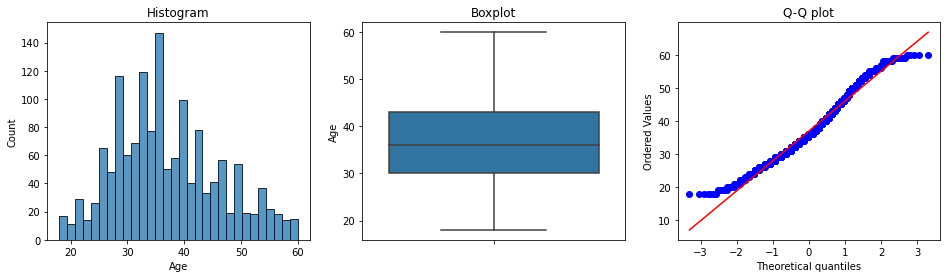

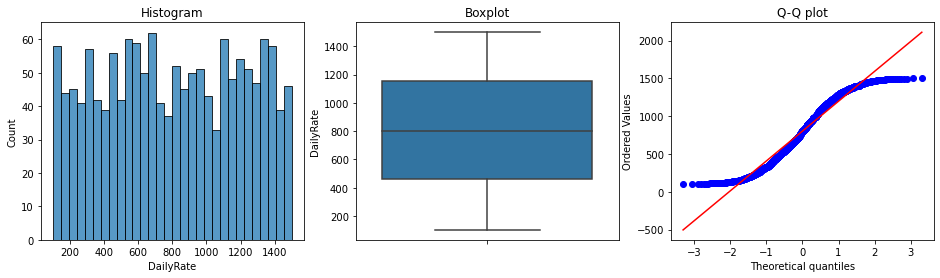

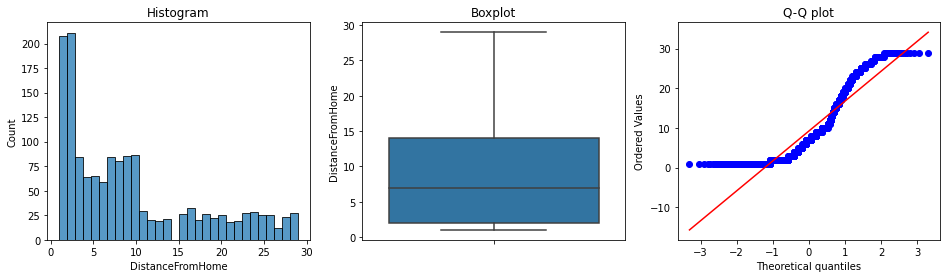

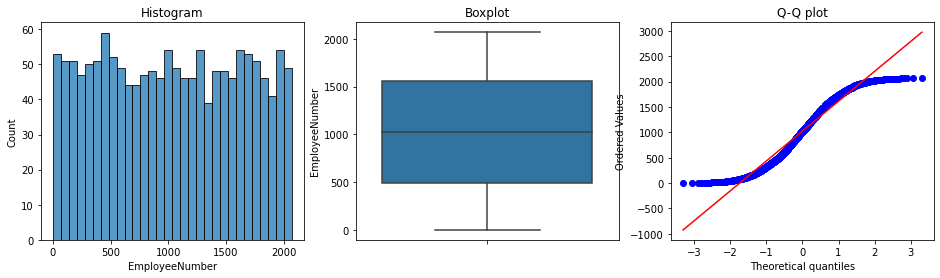

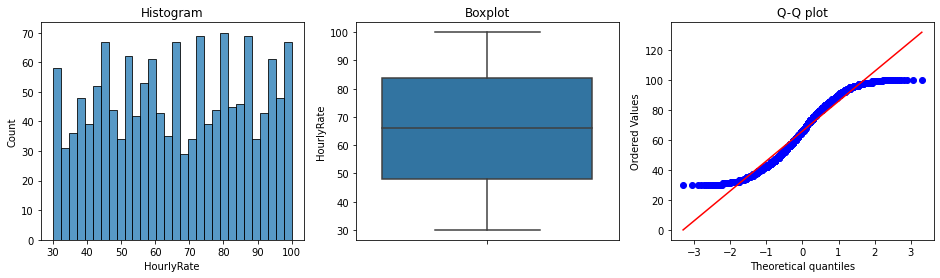

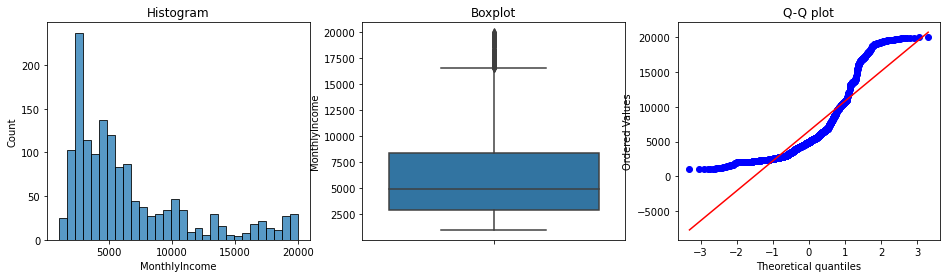

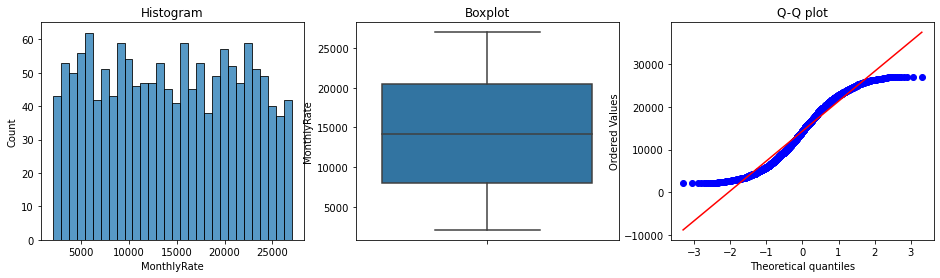

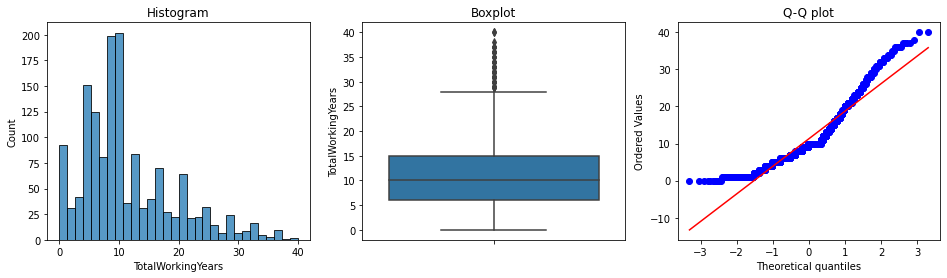

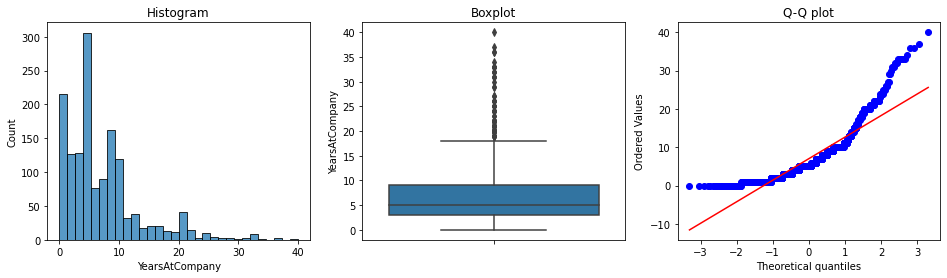

In [15]:
for var in continuous:
    diagnostic_plots(df, var)

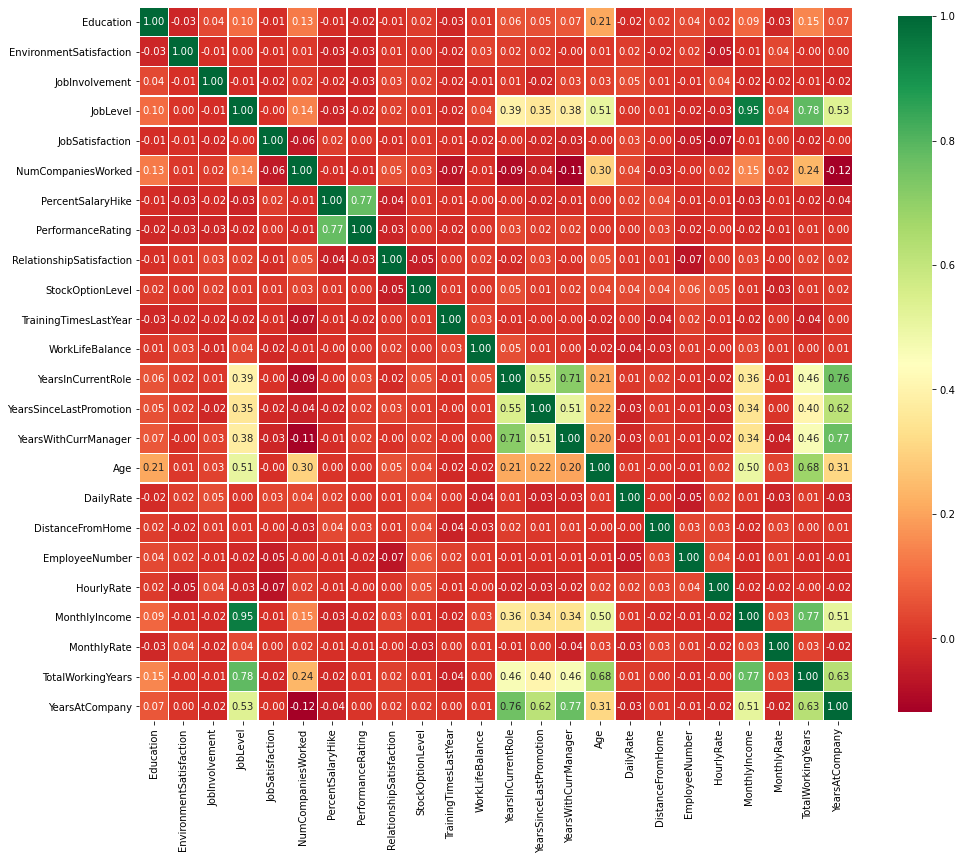

In [19]:
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(16, 16))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f', 
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

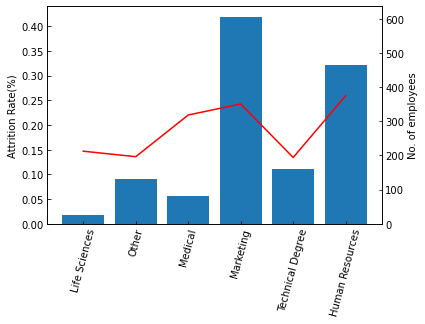

In [150]:
#plot_y = plt.hist(df['EducationField'])[0]
fig, ax1 = plt.subplots()
plt.xticks(rotation=75)
ax1.plot(df[df['Attrition'] == 'Yes']['EducationField'].value_counts()/df['EducationField'].value_counts(), color='red')
ax1.set_ylim(0, 0.44)
ax1.set_ylabel('Attrition Rate(%)')
ax1.tick_params(axis='both', direction='in')
#ax1.set_zorder(ax2.get_zorder() + 1)

ax2 = ax1.twinx()
ax2.bar(df['EducationField'].unique(), df['EducationField'].value_counts(sort=False))
ax2.set_ylabel('No. of employees')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)